## Checks book for final assignment

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(f"D:/Docs/train_1.csv", encoding='mac_roman')
#tickets = pd.read_csv(f"D:/SYED/Docs/train.csv", encoding='mac_roman')

In [3]:
df.head(3)

,ticket_id,city,ticket_date,disposition,fine_amount,late_fee,judgment_amount,balance_due,payment_status,compliance
0,22056,CHICAGO,2004-03-16,Responsible,250.0,25.0,305.0,305.0,NO PAYMENT APPLIED,0.0
1,27586,Detroit,2004-04-23,Responsible,750.0,75.0,855.0,75.0,PAID IN FULL,1.0
2,22062,Detroit,2004-04-26,Not Responsible,250.0,0.0,0.0,0.0,NO PAYMENT APPLIED,NaN


In [15]:
df['ticket_date'] = pd.to_datetime(df['ticket_date'], format="%Y-%m-%d %H:%M:%S", errors='coerce')

In [16]:
df.head(3)

,ticket_id,city,ticket_date,disposition,fine_amount,late_fee,judgment_amount,balance_due,payment_status,compliance,ticket_date_new
0,22056,CHICAGO,2004-03-16,Responsible,250.0,25.0,305.0,305.0,NO PAYMENT APPLIED,0.0,2004-03-16
1,27586,Detroit,2004-04-23,Responsible,750.0,75.0,855.0,75.0,PAID IN FULL,1.0,2004-04-23
2,22062,Detroit,2004-04-26,Not Responsible,250.0,0.0,0.0,0.0,NO PAYMENT APPLIED,NaN,2004-04-26


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250296 entries, 0 to 250295
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   ticket_id        250296 non-null  int64         
 1   city             250296 non-null  object        
 2   ticket_date      250296 non-null  datetime64[ns]
 3   disposition      250296 non-null  object        
 4   fine_amount      250295 non-null  float64       
 5   late_fee         250296 non-null  float64       
 6   judgment_amount  250296 non-null  float64       
 7   balance_due      250296 non-null  float64       
 8   payment_status   250296 non-null  object        
 9   compliance       159880 non-null  float64       
 10  ticket_date_new  250296 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(5), int64(1), object(3)
memory usage: 21.0+ MB


In [19]:
df.drop(['ticket_date_new'], axis = 1)

,ticket_id,city,ticket_date,disposition,fine_amount,late_fee,judgment_amount,balance_due,payment_status,compliance
0,22056,CHICAGO,2004-03-16,Responsible,250.0,25.0,305.0,305.0,NO PAYMENT APPLIED,0.0
1,27586,Detroit,2004-04-23,Responsible,750.0,75.0,855.0,75.0,PAID IN FULL,1.0
2,22062,Detroit,2004-04-26,Not Responsible,250.0,0.0,0.0,0.0,NO PAYMENT APPLIED,NaN
3,22084,Detroit,2004-04-26,Not Responsible,250.0,0.0,0.0,0.0,NO PAYMENT APPLIED,NaN
4,22093,Detroit,2004-04-26,Not Responsible,250.0,0.0,0.0,0.0,NO PAYMENT APPLIED,NaN
...,...,...,...,...,...,...,...,...,...,...
250291,284878,Detroit,2011-12-29,Not Responsible,200.0,0.0,0.0,0.0,NO PAYMENT APPLIED,NaN
250292,284338,WESTERVILLE,2011-12-30,Not Responsible,200.0,0.0,0.0,0.0,NO PAYMENT APPLIED,NaN
250293,284333,CHICO,2011-12-30,Responsible,200.0,20.0,250.0,250.0,NO PAYMENT APPLIED,0.0
250294,284882,Detroit,2011-12-30,Not Responsible,100.0,0.0,0.0,0.0,NO PAYMENT APPLIED,NaN


In [21]:
df['disposition'].value_counts()

Responsible        159880
Not Responsible     89725
PENDING               691
Name: disposition, dtype: int64

In [22]:
df['disposition'].replace(['Not Responsible', 'Responsible', 'PENDING'], [0, 1, 2], inplace=True)

In [23]:
df['disposition'].value_counts()

1    159880
0     89725
2       691
Name: disposition, dtype: int64

In [24]:
df.describe()

,ticket_id,disposition,fine_amount,late_fee,judgment_amount,balance_due,compliance
count,250296.000000,250296.000000,250295.000000,250296.000000,250296.000000,250296.000000,159880.000000
mean,152658.310996,0.644285,374.405034,21.495365,268.696091,222.457945,0.072536
std,77182.875912,0.484463,707.200834,56.465228,626.925435,606.404493,0.259374
min,18645.000000,0.000000,0.000000,0.000000,0.000000,-7750.000000,0.000000
25%,86546.750000,0.000000,200.000000,0.000000,0.000000,0.000000,0.000000
50%,152590.500000,1.000000,250.000000,10.000000,140.000000,25.000000,0.000000
75%,219881.250000,1.000000,250.000000,25.000000,305.000000,305.000000,0.000000
max,299363.000000,2.000000,10000.000000,1000.000000,11030.000000,11030.000000,1.000000


<AxesSubplot:>

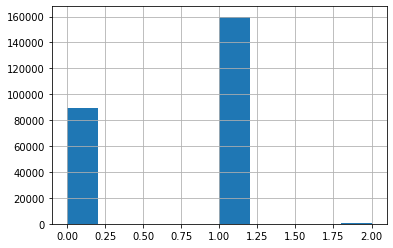

In [25]:
df['disposition'].hist()

In [27]:
#Make paid in full also as compliant
df.loc[df['payment_status'] == 'PAID IN FULL', 'compliance'] = 1

In [28]:
df['payment_status'].value_counts()

NO PAYMENT APPLIED         209183
PAID IN FULL                31931
PARTIAL PAYMENT APPLIED      9182
Name: payment_status, dtype: int64

In [29]:
# Need to encode the text values as numbers as well
df['payment_status'] = df['payment_status'].astype(int)
df['payment_status'].value_counts()


ValueError: invalid literal for int() with base 10: 'NO PAYMENT APPLIED'

In [ ]:
tickets.head(5)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#Feature selection is very interesting phase here where by own intuition I have to select the features
#which might give best fit for data at hand

feature_names_tickets = ['ticket_id', 'disposition', 'ticket_issued_date', 'fine_amount']
X_tickets = tickets[feature_names_tickets]
#Our target variable is compliance i.e., ticket chances of getting PAID
y_tickets = tickets['compliance']
X_train, X_test, y_train, y_test = train_test_split(X_tickets, y_tickets, random_state = 0)

In [ ]:
clf = LogisticRegression(C=100).fit(X_train, y_train)